<a href="https://colab.research.google.com/github/DEBMALYASEN/ABC/blob/master/hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#load the data
from google.colab import files
upoladed=files.upload()

Saving hotel_train.csv to hotel_train (1).csv


In [ ]:
#STORE DATA IN VARIABLE
reviewdata=pd.read_csv('hotel_train.csv')
#PRINT FIRST 10 ROWS
reviewdata.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


In [ ]:




reviewdata.shape

(38932, 5)

In [ ]:
reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
reviewdata.describe().T

,count,unique,top,freq
User_ID,38932,38932,id32547,1
Description,38932,38932,The hotel was very centralized. Clean and spac...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [ ]:
#EDA
count =reviewdata.isnull().sum().sort_values(ascending =False)


In [ ]:

count

Is_Response     0
Device_Used     0
Browser_Used    0
Description     0
User_ID         0
dtype: int64

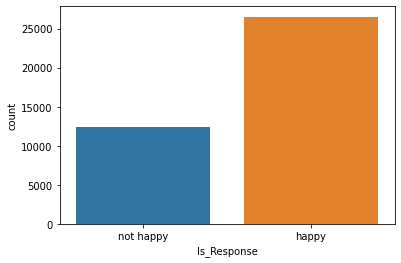

In [ ]:

sns.countplot(reviewdata['Is_Response'])

In [ ]:
reviewdata=reviewdata.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1)
reviewdata

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [ ]:
X=reviewdata.iloc[:,:-1]
Y=reviewdata.iloc[:,-1]

In [ ]:
X

,Description
0,The room was kind of clean but had a VERY stro...
1,I stayed at the Crown Plaza April -- - April -...
2,I booked this hotel through Hotwire at the low...
3,Stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...
...,...
38927,We arrived late at night and walked in to a ch...
38928,The only positive impression is location and p...
38929,Traveling with friends for shopping and a show...
38930,The experience was just ok. We paid extra for ...


In [ ]:

X

,Description
0,The room was kind of clean but had a VERY stro...
1,I stayed at the Crown Plaza April -- - April -...
2,I booked this hotel through Hotwire at the low...
3,Stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...
...,...
38927,We arrived late at night and walked in to a ch...
38928,The only positive impression is location and p...
38929,Traveling with friends for shopping and a show...
38930,The experience was just ok. We paid extra for ...


In [ ]:

#cleaning square brackets,numbers ,punctuation and converting to lower case
import re 
import string
def text_clean(text):
    text=text.lower()
    text=re.sub('\[.*?\]',' ',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    text=re.sub('\w*\d\w*',' ',text)
    text=re.sub('[''"",,]',' ',text)
    text=re.sub('\n',' ',text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    
    return text
cleaned=lambda x:text_clean(x)

In [ ]:
X['Cleaned_Description']=pd.DataFrame(X.Description.apply(cleaned))

In [ ]:
X

,Description,Cleaned_Description
0,The room was kind of clean but had a VERY stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,i stayed at the crown plaza april april ...
2,I booked this hotel through Hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
...,...,...
38927,We arrived late at night and walked in to a ch...,we arrived late at night and walked in to a ch...
38928,The only positive impression is location and p...,the only positive impression is location and p...
38929,Traveling with friends for shopping and a show...,traveling with friends for shopping and a show...
38930,The experience was just ok. We paid extra for ...,the experience was just ok we paid extra for ...


In [ ]:
X=X.drop(columns=['Description'],axis=1)

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.1,random_state=42)

In [ ]:





X_train.shape


(35038, 1)

In [ ]:




X_test.shape

(3894, 1)

In [ ]:

Y_train

28593        happy
23629    not happy
27349    not happy
12560        happy
14782        happy
           ...    
6265     not happy
11284        happy
38158    not happy
860          happy
15795    not happy
Name: Is_Response, Length: 35038, dtype: object

In [ ]:
X_train

,Cleaned_Description
28593,the room was large and you can t beat this loc...
23629,we visited this hotel this summer the be...
27349,the hotel is fine a bit rustic as the buildin...
12560,my husband found this hotel by searching on th...
14782,we recently spent a lovely three night stay at...
...,...
6265,i stayed at the millennium biltmore for one ev...
11284,i got the shelburne on priceline for a good de...
38158,i just returned from a five day stay in chicag...
860,stayed here for three days on business and fou...


In [ ]:
tvec = TfidfVectorizer()
clf = LogisticRegression(solver='lbfgs', max_iter=1000)

model = Pipeline([('vectorizer', tvec), ('classifier', clf)])

In [ ]:
model.fit(X_train, Y_train)

ValueError: ignored

In [ ]:


Y_pred = model.predict(X_test)

print(f'Accurcy: {accuracy_score(Y_pred, Y_test)}')
print(f'Precision: {precision_score(Y_pred, Y_test, average="weighted")}')
print(f'Recall: {recall_score(Y_pred, Y_test, average="weighted")}')

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,4), fontsize=12, model='clf'):
    """
    Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix,
    as a seaborn heatmap. 
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, ax=ax, fmt="d", cmap=plt.cm.Oranges)   
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred)
uniq_labels = unique_labels(Y_test, Y_pred)

print_confusion_matrix(conf_mat, uniq_labels)

In [ ]:
example="I'm delighted"
result=model.predict(example)
result

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
X_train.shape==Y_train.shape

In [ ]:
X_train.shape

In [ ]:
Y_train.shape